# What Causes Violence in the United States?
### Sean Riley

As the United States eases out of the worst to come from the COVID-19 pandemic, since the World Health Orgonization has declared it no longer a pandemic, the people of the United States have moved or in a better word returned to the issues thaty plagued the country well before and well after the pandemic. One of these issues is gun violence. Gun violence in the United States is the second highest cause of death in the United States, but what does that tell us about violence as a whole in the United States? Although gun violence is high compared to other sources of violence in the United States, how has it fluctuated over the years? Today we will be looking at [this](https://www.kaggle.com/datasets/williecosta/firearm-suicide-rates-1949-2020) dataset that tracks gun violence from the years 1949 to 2020. Make sure to download it and place it in a destination that you can remember.

## Getting Started
Here are the imports that we will be using to get us started

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [83]:
data = pd.read_csv('/content/drive/MyDrive/dataset.csv')
data.head

<bound method NDFrame.head of       year          state            division  total_population       fss  \
0     1949        Alabama  East South Central         3004000.0  0.717949   
1     1949        Arizona            Mountain          726000.0  0.575000   
2     1949       Arkansas  West South Central         1835000.0  0.671053   
3     1949     California             Pacific        10499000.0  0.382623   
4     1949       Colorado            Mountain         1249000.0  0.551570   
...    ...            ...                 ...               ...       ...   
3646  2020       Virginia      South Atlantic         8590563.0  0.580350   
3647  2020     Washington             Pacific         7693612.0  0.509901   
3648  2020  West Virginia      South Atlantic         1784787.0  0.621469   
3649  2020      Wisconsin  East North Central         5832655.0  0.510393   
3650  2020        Wyoming            Mountain          582328.0  0.703297   

     homicide_rate firearm_homicide_rate nonf

The above code will successfully transform the data contained in the csv file you downloaded into a pandas data frame. Make sure to change the file path to where the file is located for you. Feel free to add other modifiers that feel appropriate and not just the file path. For a full list of parameters that can be passed to the function, visit [this](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) website

# Cleaning Data
That's a lot of data we just got! Let's trim it down so that we only have the data we want. The data seperates the homicide and gun violence statistics by race which we do not need as we are looking at gun violence as a whole. We'll be using the drop() function to remove unwanted columns from our data frame. By default, the function drops rows specified by their index. Instead, we'll specify that we want columns removed.

In [84]:
data = data.drop(columns = ['nextyearnonwhitefss', 'nextyearwhitefss', 'nextyearfss', 'nonwhite_fss', 'division', 'fss', 'white_fss'])
data.head

<bound method NDFrame.head of       year          state  total_population homicide_rate  \
0     1949        Alabama         3004000.0   14.28095872   
1     1949        Arizona          726000.0    5.64738292   
2     1949       Arkansas         1835000.0   7.901907357   
3     1949     California        10499000.0    4.61948757   
4     1949       Colorado         1249000.0   5.044035228   
...    ...            ...               ...           ...   
3646  2020       Virginia         8590563.0   6.181201395   
3647  2020     Washington         7693612.0   4.185290342   
3648  2020  West Virginia         1784787.0   6.387316806   
3649  2020      Wisconsin         5832655.0   5.726380182   
3650  2020        Wyoming          582328.0    4.29311316   

     firearm_homicide_rate nonfirearm_homicide_rate  firearm_suicides  \
0              7.822902796              6.458055925               140   
1              3.168044077              2.479338843                46   
2              4.1

That looks a bit better but we are confronted by another problem. If you look at the data you can see that it is all organized on a state to state basis. If we want to look at gun violence in the United States, we'll have to combine some data.

# Visualizing Data
First, we'll attempt to compare the total firearm homicides across years and see what they can tell us about the nature of firearm violence in the United States. To do that we'll write the following code:

In [85]:
year = 1949
tot_gun_homi = {}
while(year < 2021):
  total = 0
  temp_data = data[data['year'] == year]
  for i, row in temp_data.iterrows():
    if math.isnan(row['firearm_homicides']):
      total += 0
    else:
      total += row['firearm_homicides']
  tot_gun_homi[year] = total
  year += 1
print(tot_gun_homi)

{1949: 4252.0, 1950: 4179.0, 1951: 3898.0, 1952: 4244.0, 1953: 4013.0, 1954: 4115.0, 1955: 3807.0, 1956: 4039.0, 1957: 4010.0, 1958: 4230.0, 1959: 4457.0, 1960: 4627.0, 1961: 4753.0, 1962: 4954.0, 1963: 5126.0, 1964: 5474.0, 1965: 6158.0, 1966: 6855.0, 1967: 8332.0, 1968: 9425.0, 1969: 10174.0, 1970: 11213.0, 1971: 12423.0, 1972: 13382.0, 1973: 13752.0, 1974: 14737.0, 1975: 14295.0, 1976: 12766.0, 1977: 12874.0, 1978: 13386.0, 1979: 14502.0, 1980: 15522.0, 1981: 15089.0, 1982: 13830.0, 1983: 12040.0, 1984: 11815.0, 1985: 11836.0, 1986: 13029.0, 1987: 12657.0, 1988: 13645.0, 1989: 14464.0, 1990: 16218.0, 1991: 17746.0, 1992: 17488.0, 1993: 18253.0, 1994: 17527.0, 1995: 15551.0, 1996: 14037.0, 1997: 13252.0, 1998: 11798.0, 1999: 10828.0, 2000: 10792.0, 2001: 11348.0, 2002: 11829.0, 2003: 11920.0, 2004: 11624.0, 2005: 12352.0, 2006: 12791.0, 2007: 12632.0, 2008: 12179.0, 2009: 11493.0, 2010: 11078.0, 2011: 11068.0, 2012: 11622.0, 2013: 11208.0, 2014: 11008.0, 2015: 12979.0, 2016: 14415.0,

We now have a list of the total firearm homicides per each year tracked by the data. Let's plot this data to see how it looks. We made sure to remove any instances of NaN when calculating the totals per year as that would result in missing data.

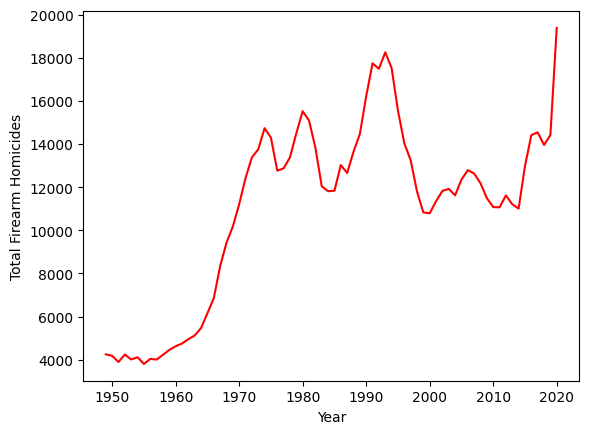

In [86]:
plt.plot(tot_gun_homi.keys(), tot_gun_homi.values(), color = 'red')
plt.xlabel('Year')
plt.ylabel('Total Firearm Homicides')
plt.show()

This is the first time we will utilize pyplot in the tutorial and it most certainly won't be our last. Pyplot is an easy way for us to visualize our data by graphing it. Our data can be graphed in a variety of ways due to Pyplot but we will use a simple line graph as all of these data points are connected. An in-depth and easy to follow tutorial of Pyplot is located [here](https://matplotlib.org/stable/tutorials/introductory/pyplot.html).

Looking at this graph it appears that firearm homicides have only gone up over the past 70 years. The steep decline can be linked to the pahsing out of leaded gasoline in automobiles which has been linked to lowering the IQ of nearly half of the people alive at the time and increasing violent crime. Let's take a look at how the trend in firearm homicides compares to the trend of homicides in total.

In [87]:
year = 1949
tot_homi = {}
while(year < 2021):
  total = 0
  temp_data = data[data['year'] == year]
  for i, row in temp_data.iterrows():
    if math.isnan(row['total_homicides']):
      total += 0
    else:
      total += row['total_homicides']
  tot_homi[year] = total
  year += 1
print(tot_homi)

{1949: 8033, 1950: 7942, 1951: 7495, 1952: 8054, 1953: 7640, 1954: 7735, 1955: 7418, 1956: 7629, 1957: 7641, 1958: 7815, 1959: 8159, 1960: 8464, 1961: 8578, 1962: 9013, 1963: 9225, 1964: 9814, 1965: 10712, 1966: 11606, 1967: 13425, 1968: 14686, 1969: 15477, 1970: 16848, 1971: 18787, 1972: 19638, 1973: 20465, 1974: 21465, 1975: 21310, 1976: 19554, 1977: 19968, 1978: 20432, 1979: 22202, 1980: 23967, 1981: 23361, 1982: 22073, 1983: 19922, 1984: 19510, 1985: 19628, 1986: 21462, 1987: 20812, 1988: 21784, 1989: 22578, 1990: 24614, 1991: 26254, 1992: 25144, 1993: 25653, 1994: 24547, 1995: 22552, 1996: 20634, 1997: 19491, 1998: 17893, 1999: 16888, 2000: 16765, 2001: 20308, 2002: 17637, 2003: 17732, 2004: 17357, 2005: 18123, 2006: 18573, 2007: 18361, 2008: 17826, 2009: 16799, 2010: 16259, 2011: 16238, 2012: 16688, 2013: 16121, 2014: 15872, 2015: 17793, 2016: 19362, 2017: 19510, 2018: 18830, 2019: 19140, 2020: 24575}


Text(0, 0.5, 'Total Homicides')

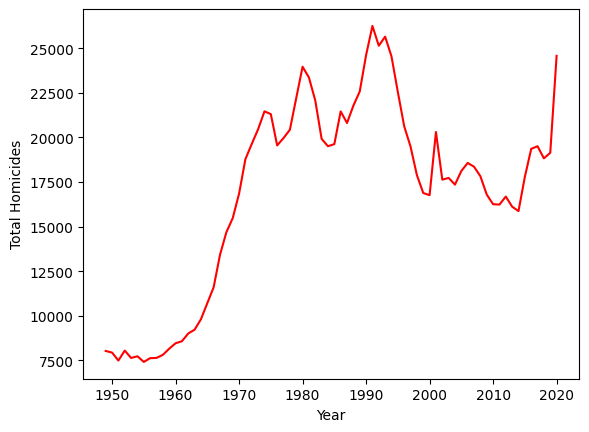

In [88]:
plt.plot(tot_homi.keys(), tot_homi.values(), color='red')
plt.xlabel('Year')
plt.ylabel('Total Homicides')

It appears that for both gun homicides and homicides in general when tracking the total homicides per yer. However, the US population in 1950 was 152 million people while it is now somewhere near 330 million people in the entire country. Even if the same amount of homicides per say, 100 thousand people, were happening, we still would have different values for the total homicides and total firearm homicides. Luckily, we wil not have to do any serious calculation to figure out the homicides per 100 thousand people per state. Simply look at the homicide_rate and firearm_homicide_rate and average them like so:

In [117]:
year = 1949
nat_gun_rate = {}
while(year < 2021):
  total = 0
  temp_data = data[data['year'] == year]
  count = 0
  for i, row in temp_data.iterrows():
    if row['firearm_homicide_rate'] == '#VALUE!':
      total +=0
    else:
      total += float(row['firearm_homicide_rate'])
    count += 1
  nat_gun_rate[year] = total/count
  year += 1
print(nat_gun_rate)

{1949: 3.056359932897959, 1950: 2.801278793040816, 1951: 2.488710676265306, 1952: 2.815585550591837, 1953: 2.533276616204082, 1954: 2.6421576042244905, 1955: 2.371626386489796, 1956: 2.444535302816327, 1957: 2.4971578583265304, 1958: 2.5251352317959186, 1959: 2.6541674098775503, 1960: 2.698241871666666, 1961: 2.735105603960785, 1962: 2.7705700386470586, 1963: 2.891423051372549, 1964: 3.0590680389803904, 1965: 3.257905389254902, 1966: 3.4736218678823527, 1967: 4.16054000309804, 1968: 4.348170909235295, 1969: 4.733642024333334, 1970: 5.083981980000001, 1971: 5.4043737129803935, 1972: 5.866028603137256, 1973: 5.890051787843137, 1974: 6.408324123392158, 1975: 6.068599752803921, 1976: 5.335393604568628, 1977: 5.179297564960783, 1978: 5.402086524941178, 1979: 5.5238677400196075, 1980: 5.698110848137257, 1981: 5.609857124509804, 1982: 5.099945459686275, 1983: 4.286356912019608, 1984: 4.16528561335294, 1985: 4.176150070509805, 1986: 4.591895520392157, 1987: 4.347291335470588, 1988: 4.791995810

Once we have the data for firearm homicides, we'll graph it like before, and do the same with homicides in totality.

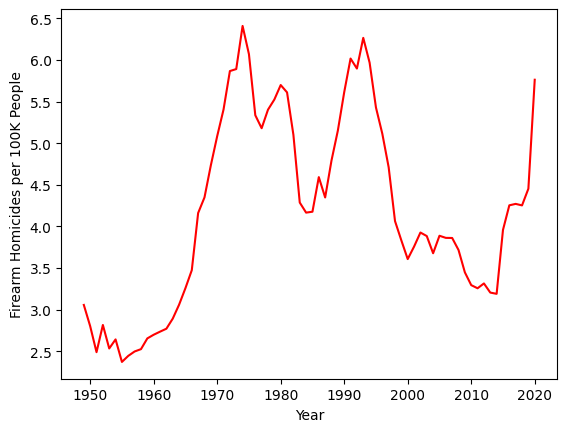

In [118]:
plt.plot(nat_gun_rate.keys(), nat_gun_rate.values(), color = 'red')
plt.xlabel('Year')
plt.ylabel('Firearm Homicides per 100K People')
plt.show()

In [116]:
year = 1949
nat_rate = {}
while(year < 2021):
  total = 0
  temp_data = data[data['year'] == year]
  count = 0
  for i, row in temp_data.iterrows():
    if row['homicide_rate'] == '#VALUE!':
      total +=0
    else:
      total += float(row['homicide_rate'])
    count += 1
  nat_rate[year] = total/count
  year += 1
print(nat_rate)

{1949: 5.500354970999998, 1950: 5.220731301102041, 1951: 4.80730433877551, 1952: 5.117790759510204, 1953: 4.668583030530612, 1954: 4.810263604959185, 1955: 4.494698727306123, 1956: 4.459231255204082, 1957: 4.503778309448979, 1958: 4.433169610265305, 1959: 4.6193744801428585, 1960: 4.753110803137255, 1961: 4.642922596529411, 1962: 4.781331311392157, 1963: 4.92249682227451, 1964: 5.172872733039216, 1965: 5.450318401450979, 1966: 5.75112834217647, 1967: 6.455660175588235, 1968: 6.6032366190980385, 1969: 7.093504075509804, 1970: 7.544197657882353, 1971: 8.135552576098041, 1972: 8.49184612901961, 1973: 8.657156002470591, 1974: 9.198381514019607, 1975: 8.91412127247059, 1976: 8.029418055039216, 1977: 8.062539402882352, 1978: 8.206524758607847, 1979: 8.53237993680392, 1980: 8.942034300509802, 1981: 8.817199479078434, 1982: 8.206485635588235, 1983: 7.232974804333335, 1984: 6.96952028819608, 1985: 6.970548166529412, 1986: 7.698950806490196, 1987: 7.355461764215685, 1988: 7.786877531019606, 1989

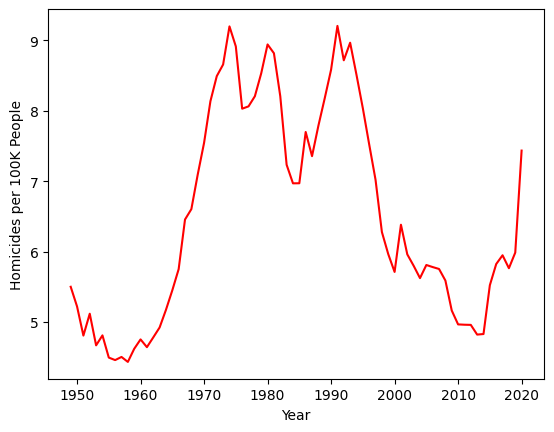

In [119]:
plt.plot(nat_rate.keys(), nat_rate.values(), color = 'red')
plt.xlabel('Year')
plt.ylabel('Homicides per 100K People')
plt.show()

# Interpreting and Analyzing Data

Although the general shape of the graph is similar when comparing the total homicides, the most important time period to look at is 2000 to 2015 where the homicides per capita are lower in relation to the peaks on the graph than they were before. This changes how we interpret the data from the graphs. Instead of gun violence and homicides in general being at an all time high, we can see that it is significantly lower the what the all time high was for total homicides, and slightly lower for firearm homicides. What we eventually want to find out is: Why? Why do firearm homicides or homicides increase. It's certainly not due to what year it is that decides how many homicides there will be. It is often due to social issues which plague the United States. This could be inflation, stagnant wages and many more. Most crime is not done for the thrill of it but rather an underlying necesity. The data we work with does not live in a vacuum so it's up to us to figure out what creates this data so we can eliminate unknown variables. To do so, let's take a look at [this](https://www.kaggle.com/datasets/pavankrishnanarne/us-inflation-dataset-1947-present) data for inflation rates in the United States.

In [120]:
inflation_data = pd.read_csv('/content/drive/MyDrive/US_inflation_rates.csv')
inflation_data.head

<bound method NDFrame.head of            date    value
0    1947-01-01   21.480
1    1947-02-01   21.620
2    1947-03-01   22.000
3    1947-04-01   22.000
4    1947-05-01   21.950
..          ...      ...
913  2023-02-01  301.648
914  2023-03-01  301.808
915  2023-04-01  302.918
916  2023-05-01  303.294
917  2023-06-01  303.841

[918 rows x 2 columns]>

The data graphs a value equating to the scale of inflation. We are not looking to compare the number itself, but rather the percent increase from year to year since inflation is constantly on the rise. We'll calculate the percent increase by taking the value from the 12th month of the year recorded and comparing it to the value from the previous year.

In [121]:
year = 1947
prev = 1
percents = {}
for i, row in inflation_data.iterrows():
  if (i + 1) % 12 == 0:
    if i >= 30 and i < 890:
      percents[year] = (row['value']/prev) - 1
    prev = row['value']
    year += 1
print(percents)

{1949: -0.018295218295218296, 1950: 0.0580262600592969, 1951: 0.05964771817453962, 1952: 0.009066868152625585, 1953: 0.005990265818045737, 1954: -0.0037216226274656705, 1955: 0.0037355248412402897, 1956: 0.028284331968738252, 1957: 0.030401737242128135, 1958: 0.017562346329469625, 1959: 0.015188125647221273, 1960: 0.013600816048962905, 1961: 0.006709158000671067, 1962: 0.012329223592135952, 1963: 0.016458196181698526, 1964: 0.011981865284974136, 1965: 0.019200000000000106, 1966: 0.033594976452119285, 1967: 0.03280680437424044, 1968: 0.04705882352941182, 1969: 0.0589887640449438, 1970: 0.055702917771883076, 1971: 0.03266331658291466, 1972: 0.03406326034063256, 1973: 0.0894117647058823, 1974: 0.12095032397408212, 1975: 0.07129094412331405, 1976: 0.050359712230215736, 1977: 0.0667808219178081, 1978: 0.08988764044943842, 1979: 0.13254786450662737, 1980: 0.12353706111833551, 1981: 0.08912037037037024, 1982: 0.03825717321997879, 1983: 0.03787103377686796, 1984: 0.04043392504930954, 1985: 0.0

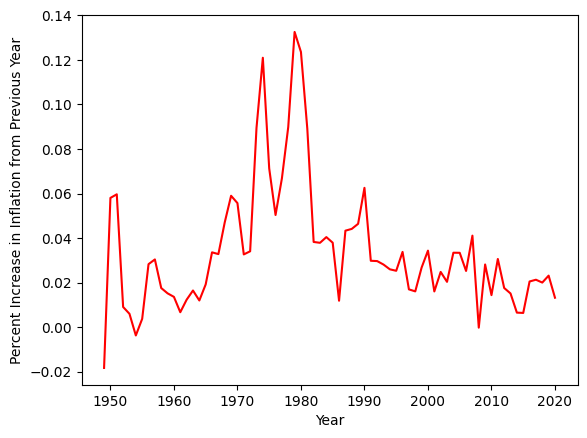

In [122]:
plt.plot(percents.keys(), percents.values(), color = 'red')
plt.xlabel('Year')
plt.ylabel('Percent Increase in Inflation from Previous Year')
plt.show()

As we can observe from the graph. Constantly increasing inflation rates compared to stagnant wages in the United States causes an almost constantly increasing homicide rate. The only times where it the homicide rate would see considerable decrease is when large social changes were made like the removal of leaded gasoline from cars, the fall of the crack-cocaine trade and a strong economy. Now, let's attempt to graph a linear regression to try and get correct prediction for homicide rates in America. To do this, we'll import a method for **Ordinary Least Squares** to factor in the inflation rate and the year for our predictions. Statsmodels provides an easy way for us to do this. If you're a natural skeptic and won't just take my word that the code works as intended (as you should) [here](https://medium.com/analytics-vidhya/ordinary-least-square-ols-method-for-linear-regression-ef8ca10aadfc) is a brief explanation of ordinary least squares

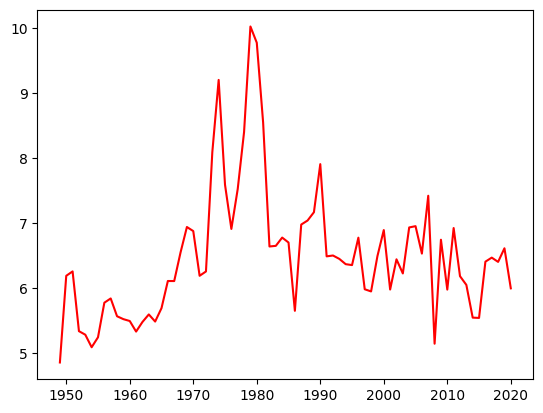

In [123]:
from statsmodels.formula.api import ols
new_data = pd.DataFrame()
new_data['inflation'] = percents.values()
new_data['homicide_rate'] = nat_rate.values()
new_data['year'] = percents.keys()
regress = ols(formula = 'homicide_rate ~ inflation*year', data = new_data).fit()
new_data['predictions'] = regress.predict()
plt.plot(new_data['year'], new_data['predictions'], color = 'red')
plt.show()

# Approaching Data from a New Angle

That doesn't look quite right. It appears that inflation rate appears to be the heaviest factor in predicting homicide rate, but it is obviously not the only factor that affects homicides in the United States. If it were, we would have a more accurate dataset. A correct response to this information would be to attempt to include this data when predicting the outcomes, but regretfully like many social issues, these factors are not well documented. [This study](https://www.sciencedirect.com/science/article/pii/S2352827319300771) supports the idea that homelessness is a factor in homicide rates but regretfully, there are no long term data sets about homelessness that are readily available. To fix this, let's make our scope a bit narrower, and return to the original dataset which groups homicides by state. By narrowing our scope of data we can *reduce the amount of error brought in by sources we are not able to account for*.

In [124]:
data = data.sort_values(by = ['state'])
count = 0
state_nums = []
curr_state = ''
for i, row in data.iterrows():
  if row['state'] != curr_state:
    count += 1
    state_nums.append(count)
    curr_state = row['state']
  else:
    state_nums.append(count)
data['state'] = state_nums
print(data)

      year  state  total_population  homicide_rate firearm_homicide_rate  \
0     1949      1         3004000.0      14.280959           7.822902796   
1560  1980      1         3893888.0      15.845345           11.73634167   
1509  1979      1         3848915.7      13.666187           9.794966411   
1305  1975      1         3669026.5      16.080560           12.51013041   
540   1960      1         3266740.0      10.530376           6.305980886   
...    ...    ...               ...            ...                   ...   
2375  1995     51          473685.0       3.166661           1.055553796   
244   1953     51          302390.1       2.976288           1.322794629   
2273  1993     51          465646.2       3.006575           2.147553228   
2426  1996     51          477704.4       3.140017           2.721348181   
3650  2020     51          582328.0       4.293113           3.091041475   

     nonfirearm_homicide_rate  firearm_suicides  total_suicides  \
0                 6.

To get this prediction on a state level we'll convert each state to it's own numeric value and the homicide rate to a numeric value as it is currently stored as an object in our dataframe.

In [125]:
for i, row in data.iterrows():
  if row['homicide_rate'] == '#VALUE!':
    data = data.drop(i)
data['homicide_rate'] = pd.to_numeric(data['homicide_rate'])
state_regress = ols(formula = 'homicide_rate ~ year * state', data = data).fit()
data['predicted_values'] = state_regress.predict()
year = 1949
pred_rate = {}
while(year < 2021):
  total = 0
  temp_data = data[data['year'] == year]
  count = 0
  for i, row in temp_data.iterrows():
    total += row['predicted_values']
    count += 1
  pred_rate[year] = total/count
  year += 1
print(data)

      year  state  total_population  homicide_rate firearm_homicide_rate  \
0     1949      1         3004000.0      14.280959           7.822902796   
1560  1980      1         3893888.0      15.845345           11.73634167   
1509  1979      1         3848915.7      13.666187           9.794966411   
1305  1975      1         3669026.5      16.080560           12.51013041   
540   1960      1         3266740.0      10.530376           6.305980886   
...    ...    ...               ...            ...                   ...   
2375  1995     51          473685.0       3.166661           1.055553796   
244   1953     51          302390.1       2.976288           1.322794629   
2273  1993     51          465646.2       3.006575           2.147553228   
2426  1996     51          477704.4       3.140017           2.721348181   
3650  2020     51          582328.0       4.293113           3.091041475   

     nonfirearm_homicide_rate  firearm_suicides  total_suicides  \
0                 6.

Now that we have our predicted values, calculating the average rate of them should create our line of best fit for the graph we created in the beginning to graph a national homicide rate.



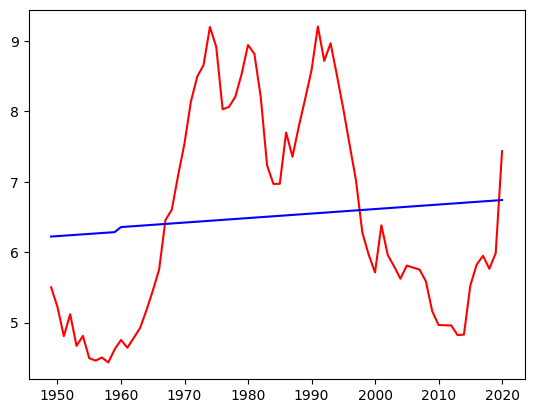

In [126]:
plt.plot(nat_rate.keys(), nat_rate.values(), color = 'red')
plt.plot(pred_rate.keys(), pred_rate.values(), color = 'blue')
plt.show()

# Drawing Conclusions About Data

This model looks a lot more linear to say the least. Compared to our original regression it is not only more satisfying to look at, but also more correct. We succesfully isolated many individual cases to then combine and use on a broader scale. In this case, we took the individual regression lines for each state, and then averaged them like we did the actual values in the beginning of the tutorial to get our line of best fit. At the beginning of this tutorial, you learned how to import and clean your data to prime it for analysis. Over the course of the tutorial you used Pyplot to visualize the data you were working with and how to manipulate the data in order to create new values from it. Even though there were a few failures in how we initially approached the topic, we came at it again with a new approach that led us to success. Data Science is a process of many trials and many failures, but it is being able to innovate and approach topics over and over again from different perspectives that lead us to success.